<a href="https://colab.research.google.com/github/Scoochgames/Scoochgames/blob/main/Final_Project_Data_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/heart.csv")
df.info()
# No missing/null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [38]:
df = df.drop_duplicates()
df.info()
# No duplicate rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [39]:
df = df[(df['RestingBP'] != 0) & (df['Cholesterol'] != 0)] # Delete any rows with a 0 in RestingBP or Cholesterol
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [40]:
df # For referencing what data should look like + column labels

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [46]:
grouped_stats = df.groupby(['Sex', 'HeartDisease'])[['Age', 'MaxHR']].mean().reset_index()
print("Mean Age and MaxHR by Sex and HeartDisease:")
print(grouped_stats)

Mean Age and MaxHR by Sex and HeartDisease:
  Sex  HeartDisease        Age       MaxHR
0   F             0  51.119718  149.183099
1   F             1  56.025000  139.250000
2   M             0  49.629032  148.987903
3   M             1  55.829114  129.449367


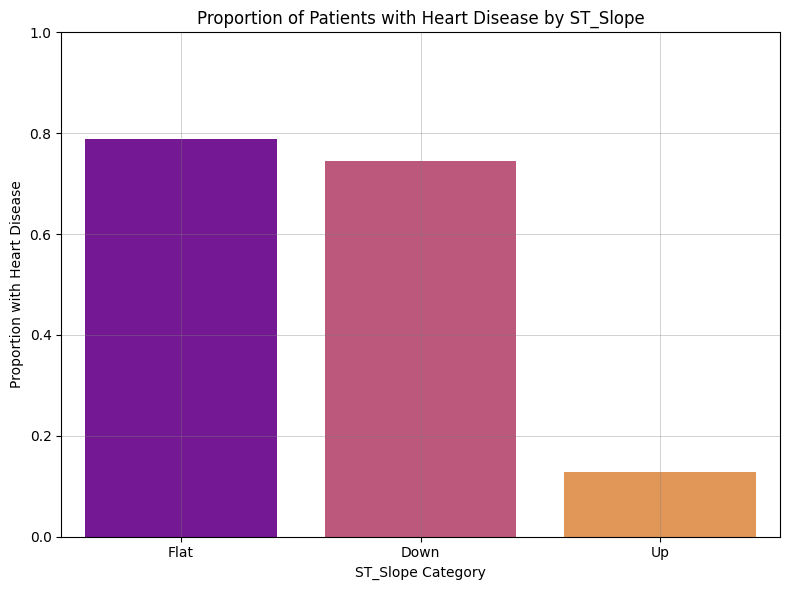

In [41]:
# Calculate counts for each combination and the proportion
st_slope_counts = df.groupby('ST_Slope')['HeartDisease'].value_counts(normalize=True).unstack()

# Filter to only show the proportion of HeartDisease=1 (Yes) and reset index to use ST_Slope as a column
st_slope_yes_hd = st_slope_counts[[1]].reset_index()
st_slope_yes_hd = st_slope_yes_hd.rename(columns={1: 'Proportion'})


# Sort by proportion for better visualization
st_slope_yes_hd = st_slope_yes_hd.sort_values(by='Proportion', ascending=False)

# Create the figure and plot
plt.figure(figsize=(8, 6))
sns.barplot(data=st_slope_yes_hd, x='ST_Slope', y='Proportion', hue='ST_Slope', palette='plasma', legend=False)

plt.title('Proportion of Patients with Heart Disease by ST_Slope')
plt.xlabel('ST_Slope Category')
plt.ylabel('Proportion with Heart Disease')
plt.ylim(0, 1) # Set y-limit to 0-1 for proportion
plt.tight_layout()
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5, zorder=0)
plt.savefig('st_slope_heart_disease_proportion.png') # Save the plot as a PNG file
plt.show()

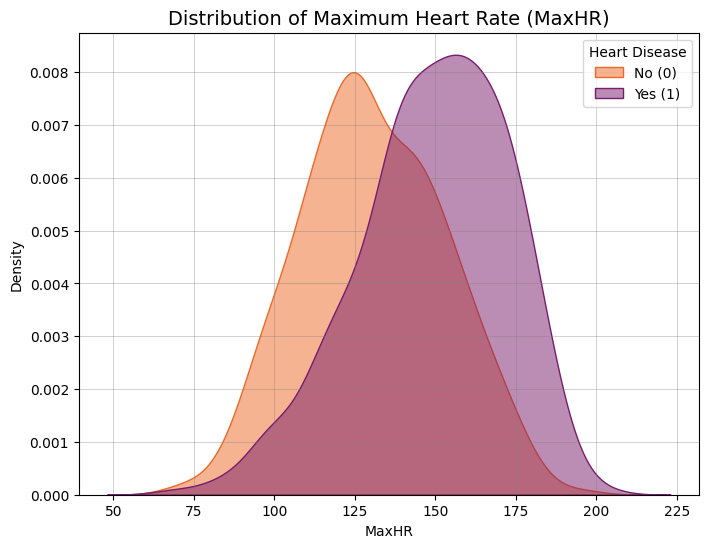

In [42]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.kdeplot(data=df, x='MaxHR', hue='HeartDisease', fill=True, alpha=.5, palette='inferno', ax=axes)
axes.set_title('Distribution of Maximum Heart Rate (MaxHR)', fontsize=14)
axes.legend(title='Heart Disease', labels=['No (0)', 'Yes (1)'])
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5, zorder=0)
plt.savefig('maxhr_distribution.png') # Save the plot as a PNG file
plt.show()

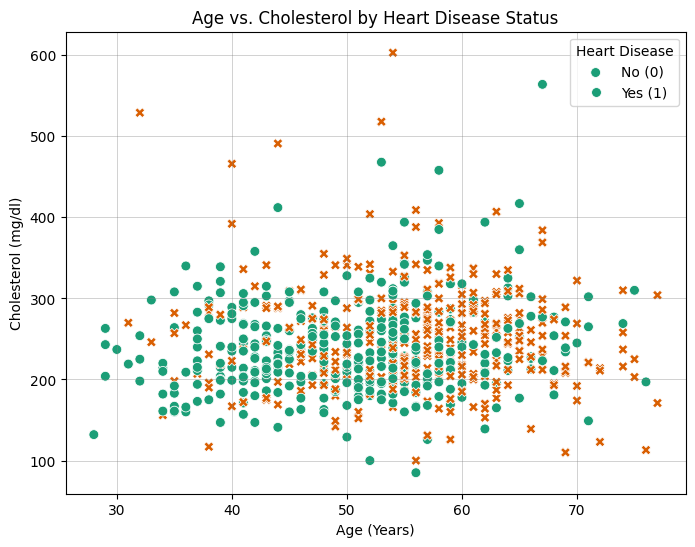

In [43]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Cholesterol', hue='HeartDisease', style='HeartDisease',
ax=axes, palette='Dark2', s=50)
axes.set_title('Age vs. Cholesterol by Heart Disease Status')
axes.set_xlabel('Age (Years)')
axes.set_ylabel('Cholesterol (mg/dl)')
legend = axes.legend(title='Heart Disease', labels=['No (0)', 'Yes (1)'])
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5, zorder=0)
legend.get_title()
plt.savefig('age_cholesterol_scatterplot.png') # Save the plot as a PNG file
plt.show()